# Q6 - Bank Customer Clustering

## 1. Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from tqdm import tqdm
tqdm.pandas()

## 2. Load Data

In [3]:
bank_customer = pd.read_csv("../Data_Q6/Bank_Customer.csv")

In [4]:
print("Shape of the dataset:", bank_customer.shape)
bank_customer.head()

Shape of the dataset: (1048567, 9)


,TransactionID,CustomerID,CustomerDateOfBirth,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2002/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2002/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2002/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2002/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2002/8/16,181156,1762.5


## 3. Data Preprocessing

In [5]:
# Check missing values
print("Missing values in the dataset before dropping: \n", bank_customer.isnull().sum())

# Drop missing values
bank_customer.dropna(inplace=True)

# Check missing values
print("Missing values in the dataset after dropping: \n", bank_customer.isnull().sum())

Missing values in the dataset before dropping: 
 TransactionID                 0
CustomerID                    0
CustomerDateOfBirth        3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64
Missing values in the dataset after dropping: 
 TransactionID              0
CustomerID                 0
CustomerDateOfBirth        0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64


In [6]:
# Drop duplicates
print("Shape of the dataset before dropping duplicates:", bank_customer.shape)
bank_customer.drop_duplicates(inplace=True)
print("Shape of the dataset after dropping duplicates:", bank_customer.shape)

Shape of the dataset before dropping duplicates: (1041614, 9)
Shape of the dataset after dropping duplicates: (1041614, 9)


In [7]:
# Function to check if the date is in the correct format '%d/%m/%y'
def is_correct_format(date_str):
    try:
        datetime.strptime(date_str, '%d/%m/%y')
        return True
    except ValueError:
        return False

# Check the format for each date in the CustomerDateOfBirth column
bank_customer['IsValidDate'] = bank_customer['CustomerDateOfBirth'].apply(is_correct_format)

# Drop rows where the date format is incorrect
print("Shape of the dataset before dropping invalid dates:", bank_customer.shape)
bank_customer = bank_customer[bank_customer['IsValidDate']]
print("Shape of the dataset after dropping invalid dates:", bank_customer.shape)

# Drop the temporary IsValidDate column
bank_customer = bank_customer.drop(columns=['IsValidDate'])
bank_customer.head()

Shape of the dataset before dropping invalid dates: (1041614, 10)
Shape of the dataset after dropping invalid dates: (984425, 10)


,TransactionID,CustomerID,CustomerDateOfBirth,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2002/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2002/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2002/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2002/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2002/8/16,181156,1762.5


In [8]:
# Print Max and min TransactionTime
print("Max TransactionTime:", bank_customer['TransactionTime'].max())
print("Min TransactionTime:", bank_customer['TransactionTime'].min())

Max TransactionTime: 235959
Min TransactionTime: 0


In [9]:
def convert_date(date_str):
    # Parse the date
    date = datetime.strptime(date_str, '%d/%m/%y')
    
    # Set a cutoff for deciding the century
    cutoff_year = 23  # Assuming the current year's last two digits
    if date.year > 2000 + cutoff_year:
        date = date.replace(year=date.year - 100)
    return date

# Apply the modified conversion function
bank_customer['CustomerDateOfBirth'] = bank_customer['CustomerDateOfBirth'].apply(convert_date)
bank_customer['TransactionDate'] = pd.to_datetime(bank_customer['TransactionDate'])
bank_customer['CustomerAge'] = bank_customer['TransactionDate'].dt.year - bank_customer['CustomerDateOfBirth'].dt.year

In [10]:
def convert_time(time_int):
    # Convert to string and pad with leading zeros if necessary
    time_str = str(time_int).zfill(6)

    # Extract hours, minutes, and seconds
    hours = time_str[:2]
    minutes = time_str[2:4]
    seconds = time_str[4:6]

    # Format as HH:MM:SS
    return f"{hours}:{minutes}:{seconds}"

# Function to combine date and time into a single datetime object
def combine_date_time(date, time_str):
    # Format the time string as HH:MM:SS
    formatted_time = convert_time(time_str)
    # Combine date and time
    return pd.to_datetime(f'{date} {formatted_time}')

# Apply the combined function to the DataFrame
bank_customer['TransactionDateTime'] = bank_customer.apply(lambda row: combine_date_time(row['TransactionDate'], row['TransactionTime']), axis=1)

In [11]:
# Drop the unnecessary columns
bank_customer = bank_customer.drop(columns=['TransactionDate', 'TransactionTime', 'CustomerDateOfBirth'])

In [12]:
# Drop Age <= 0
print("Shape of the dataset before dropping invalid ages:", bank_customer.shape)
bank_customer = bank_customer[bank_customer['CustomerAge'] > 0]
print("Shape of the dataset after dropping invalid ages:", bank_customer.shape)

Shape of the dataset before dropping invalid ages: (984425, 8)
Shape of the dataset after dropping invalid ages: (948160, 8)


In [13]:
print("Shape of the dataset:", bank_customer.shape)
bank_customer.head()

Shape of the dataset: (948160, 8)


,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,TransactionDateTime
0,T1,C5841053,F,JAMSHEDPUR,17819.05,25.0,8,2002-08-16 14:32:07
1,T2,C2142763,M,JHAJJAR,2270.69,27999.0,45,2002-08-16 14:18:58
2,T3,C4417068,F,MUMBAI,17874.44,459.0,6,2002-08-16 14:27:12
3,T4,C5342380,F,MUMBAI,866503.21,2060.0,29,2002-08-16 14:27:14
4,T5,C9031234,F,NAVI MUMBAI,6714.43,1762.5,14,2002-08-16 18:11:56


In [14]:
bank_customer.CustGender.value_counts()

CustGender
M    685477
F    262683
Name: count, dtype: int64

# 可视化

# 1. 交易金额分布

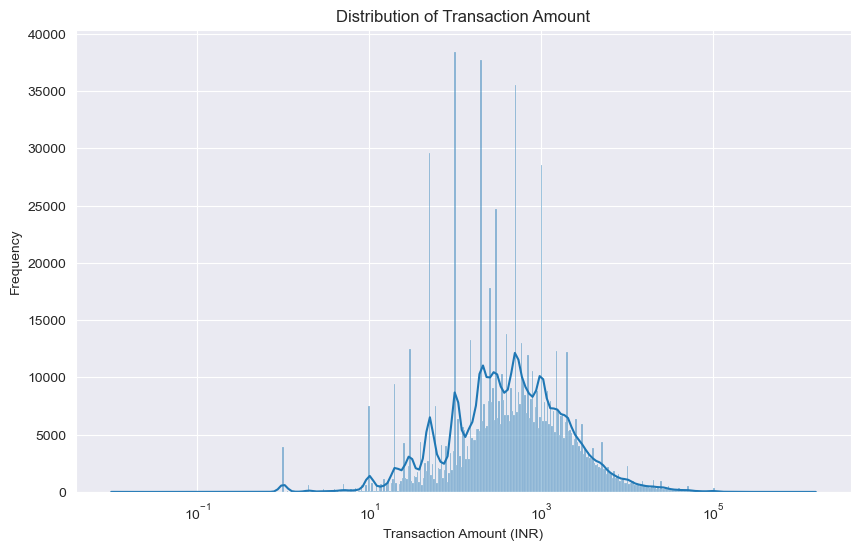

In [20]:
# To Easy to see the distribution, use log scale
# Therefore, use positive TransactionAmount only
positive_transactions = bank_customer[bank_customer['TransactionAmount (INR)'] > 0]

plt.figure(figsize=(10, 6))
sns.histplot(positive_transactions['TransactionAmount (INR)'], kde=True, log_scale=(True, False))
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Frequency')
plt.show()

# 2. 客户性别和年龄分布

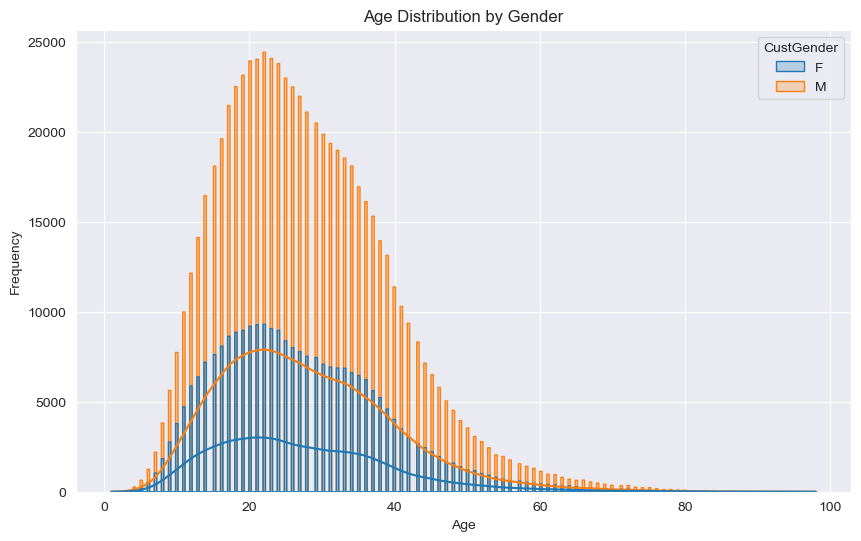

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(bank_customer, x='CustomerAge', hue='CustGender', kde=True, element='step')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

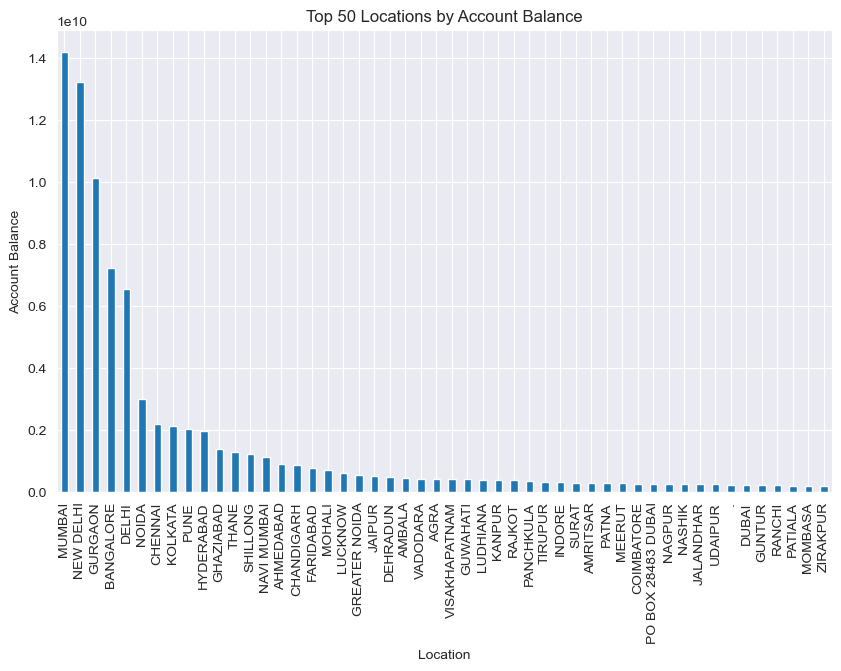

In [22]:
plt.figure(figsize=(10, 6))
top_50_locations = bank_customer.groupby('CustLocation')['CustAccountBalance'].sum().sort_values(ascending=False).head(50)
top_50_locations.plot(kind='bar')
plt.title('Top 50 Locations by Account Balance')
plt.xlabel('Location')
plt.ylabel('Account Balance')
plt.show()

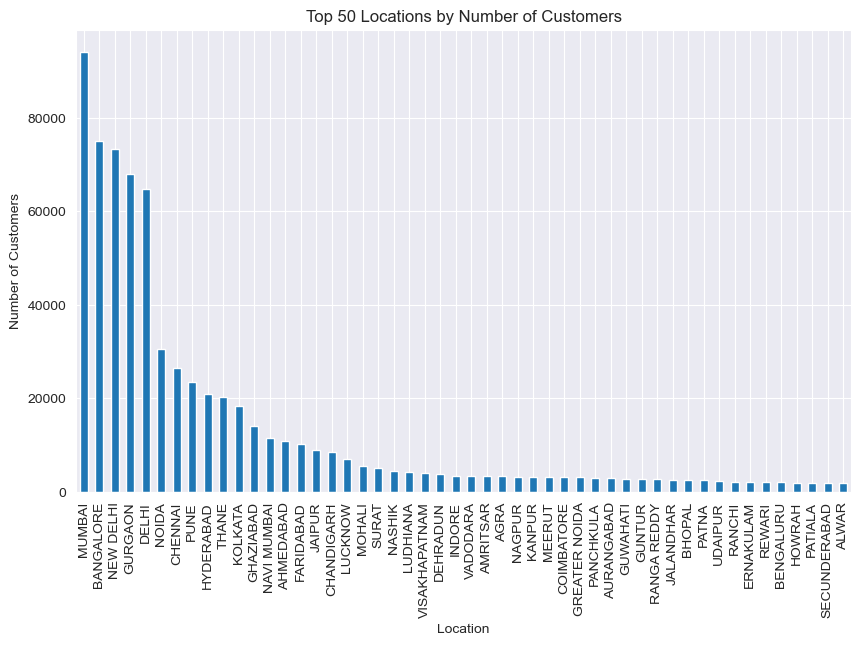

In [23]:
plt.figure(figsize=(10, 6))
top_50_locations = bank_customer.groupby('CustLocation').size().sort_values(ascending=False).head(50)
top_50_locations.plot(kind='bar')
plt.title('Top 50 Locations by Number of Customers')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.show()

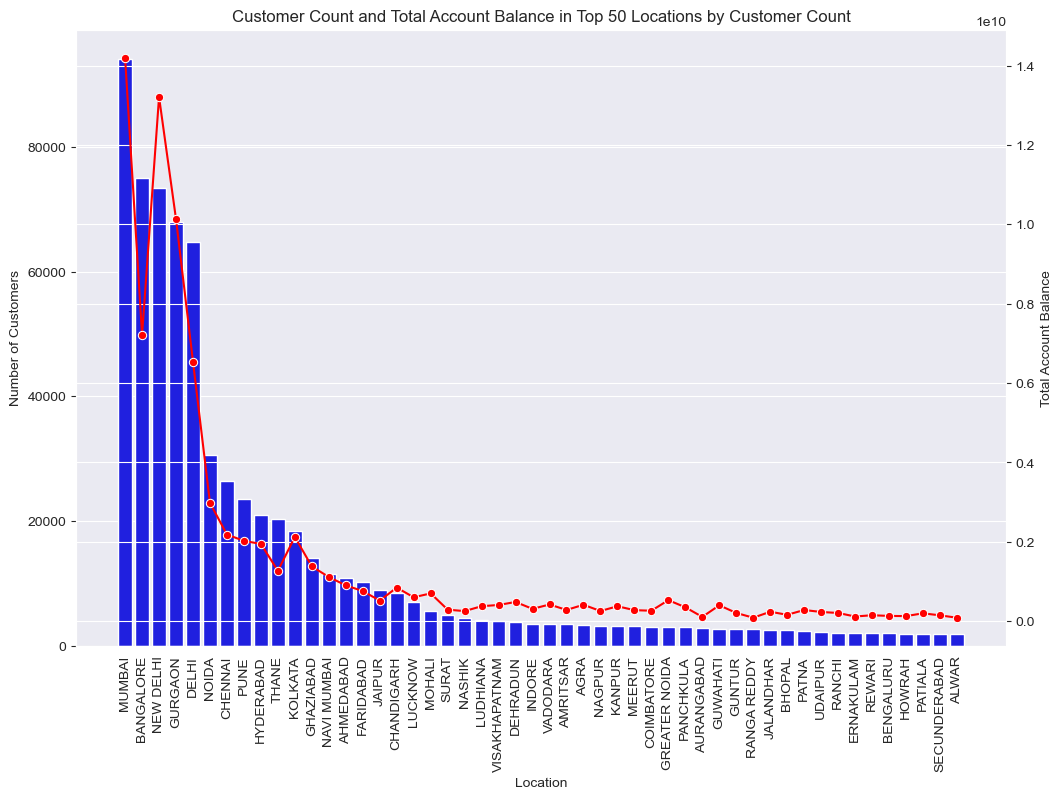

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'bank_customer' is your DataFrame
plt.figure(figsize=(12, 8))

# First, find the top 50 locations by number of customers
top_50_locations_by_customers = bank_customer.groupby('CustLocation').size().sort_values(ascending=False).head(50)

# Plot the number of customers using a bar chart
ax = sns.barplot(x=top_50_locations_by_customers.index, y=top_50_locations_by_customers.values, color='blue')
ax.set_ylabel('Number of Customers')
plt.xticks(rotation=90)

# Create a twin axis for the account balance
ax2 = ax.twinx()

# Get the total account balance for the top 50 locations
top_50_balance = bank_customer[bank_customer['CustLocation'].isin(top_50_locations_by_customers.index)].groupby('CustLocation')['CustAccountBalance'].sum()

# Ensure the order of locations matches with the first plot
top_50_balance = top_50_balance.reindex(top_50_locations_by_customers.index)

# Plot the account balance using a line chart
ax2 = sns.lineplot(x=top_50_balance.index, y=top_50_balance.values, marker='o', color='red', ax=ax2)
ax2.set_ylabel('Total Account Balance')

# Set titles and labels
plt.title('Customer Count and Total Account Balance in Top 50 Locations by Customer Count')
ax.set_xlabel('Location')

plt.show()


# 3. 性别与交易金额关系

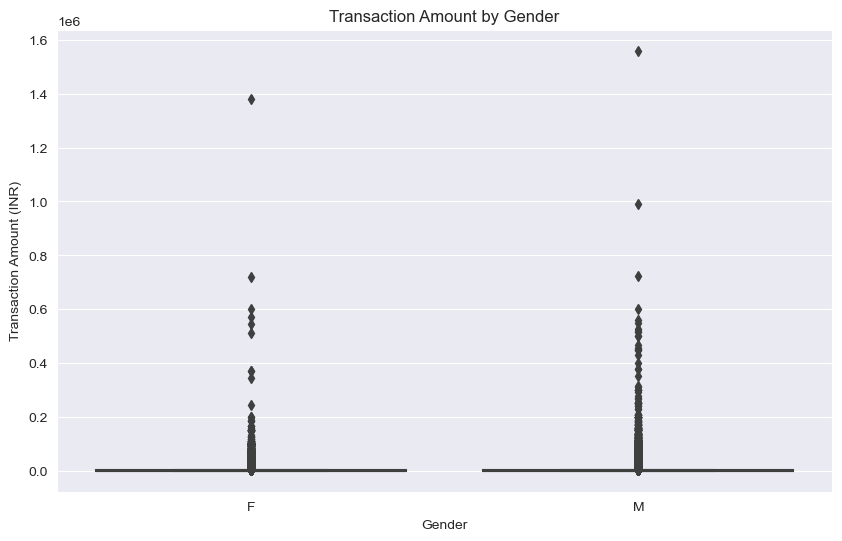

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CustGender', y='TransactionAmount (INR)', data=bank_customer)
plt.title('Transaction Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Transaction Amount (INR)')
plt.show()


# 4. 客户余额最多的50个地区

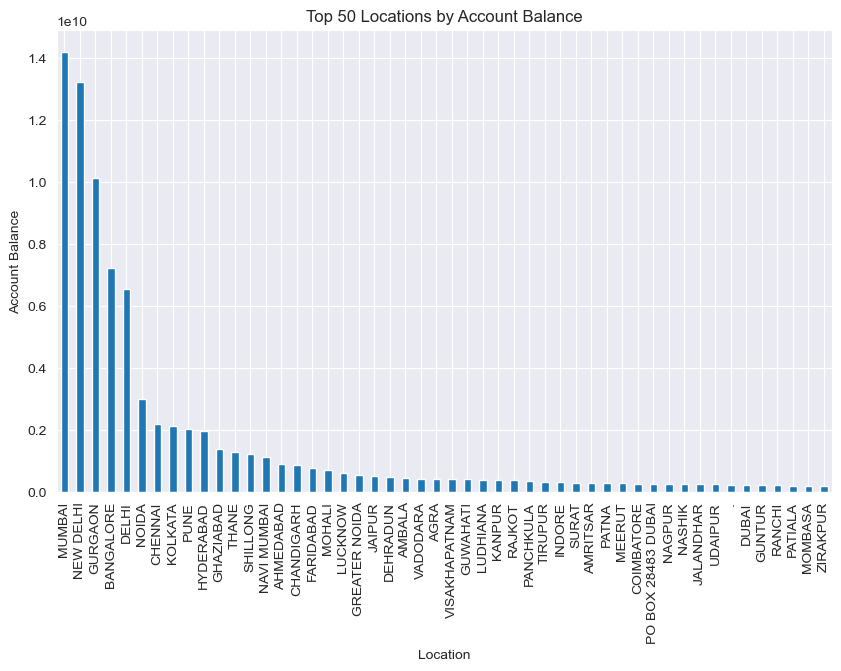

5. 每日交易量趋势

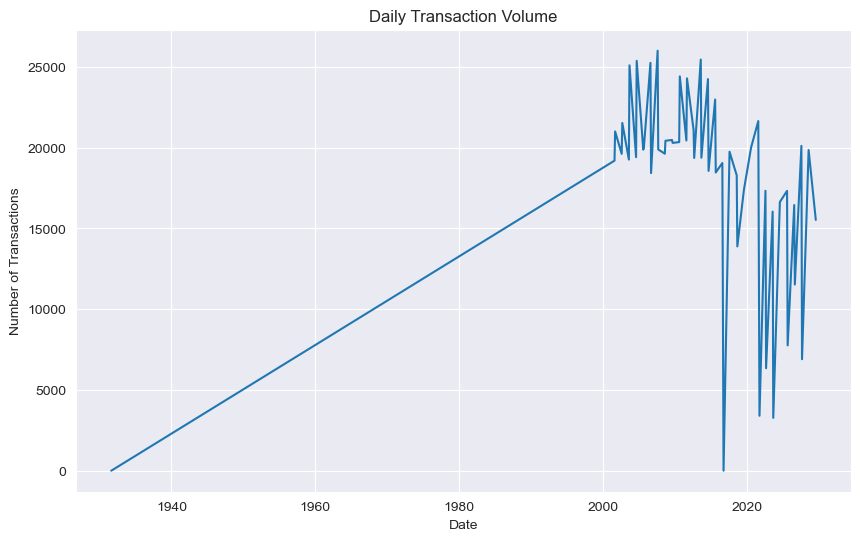

In [39]:
plt.figure(figsize=(10, 6))
daily_transactions = bank_customer.groupby(bank_customer['TransactionDateTime'].dt.date).size()
daily_transactions.plot()
plt.title('Daily Transaction Volume')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()


6. 客户年龄与账户余额关系

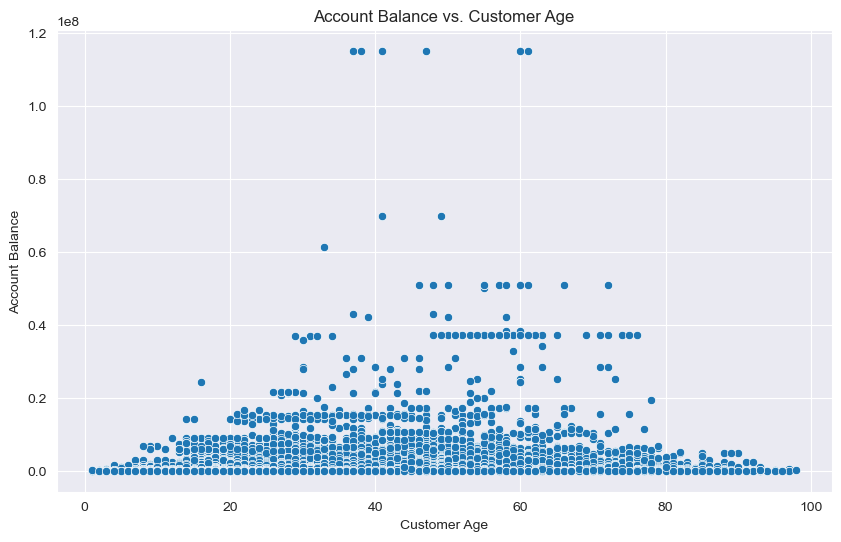

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CustomerAge', y='CustAccountBalance', data=bank_customer)
plt.title('Account Balance vs. Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Account Balance')
plt.show()


# 7. 交易时间分布

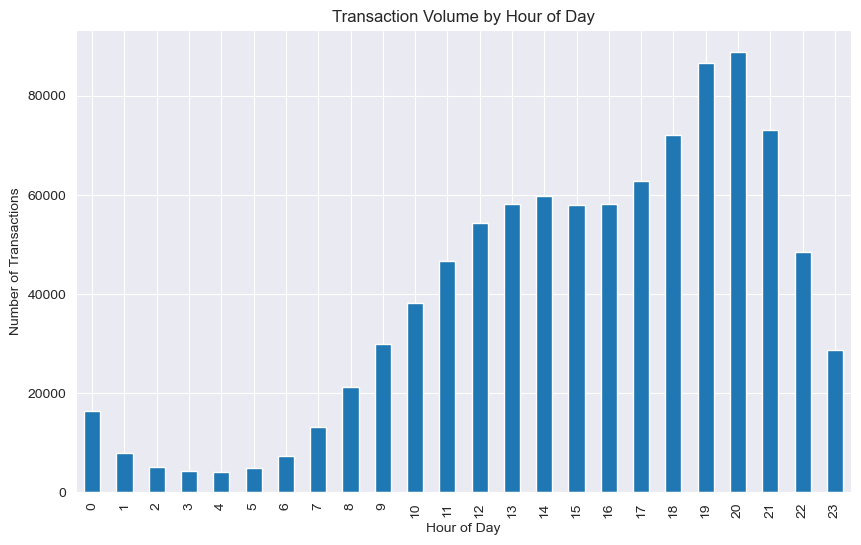

In [41]:
plt.figure(figsize=(10, 6))
bank_customer['TransactionHour'] = bank_customer['TransactionDateTime'].dt.hour
hourly_transactions = bank_customer.groupby('TransactionHour').size()
hourly_transactions.plot(kind='bar')
plt.title('Transaction Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))
plt.show()


# 8. 客户数量最多的50个地区

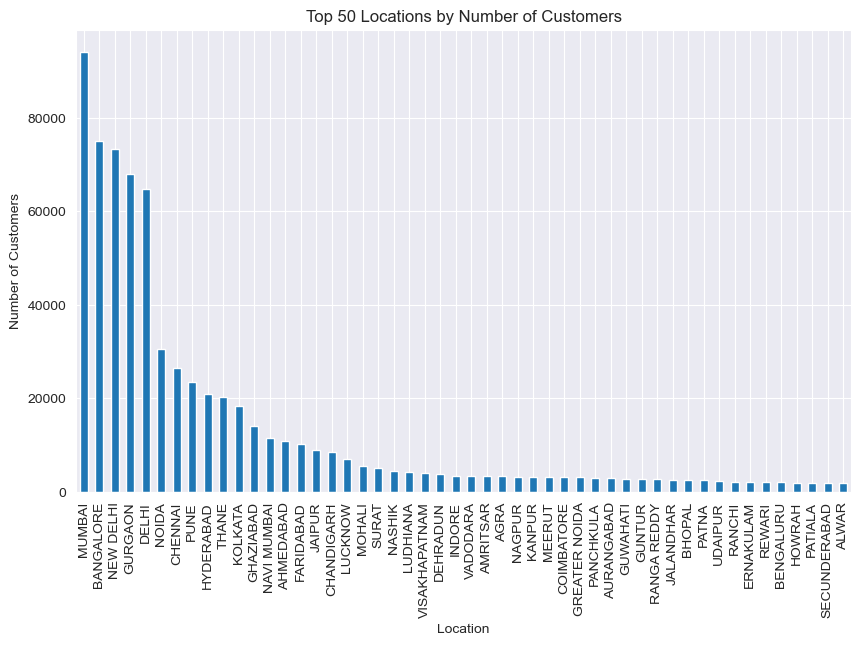

In [42]:
plt.figure(figsize=(10, 6))
top_50_locations = bank_customer.groupby('CustLocation').size().sort_values(ascending=False).head(50)
top_50_locations.plot(kind='bar')
plt.title('Top 50 Locations by Number of Customers')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.show()

# 9. 交易金额与客户年龄关系

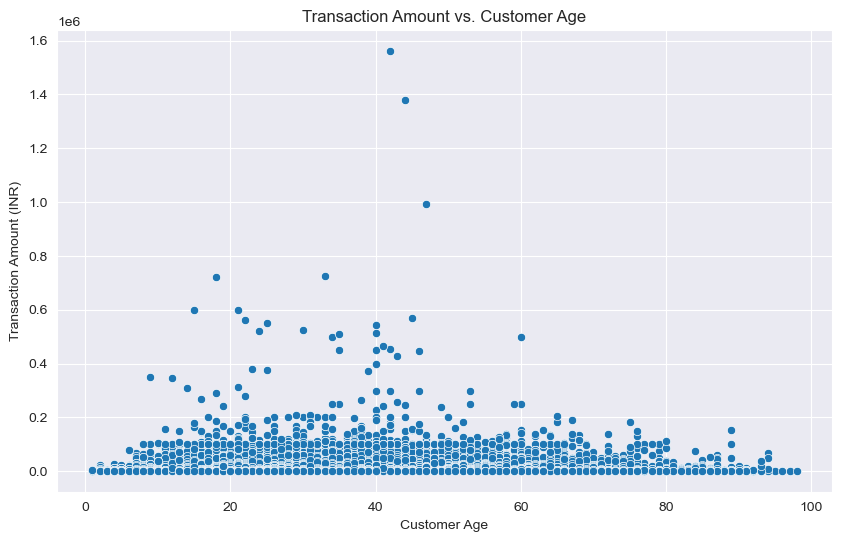

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CustomerAge', y='TransactionAmount (INR)', data=bank_customer)
plt.title('Transaction Amount vs. Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Transaction Amount (INR)')
plt.show()

# 10. 性别与账户余额关系

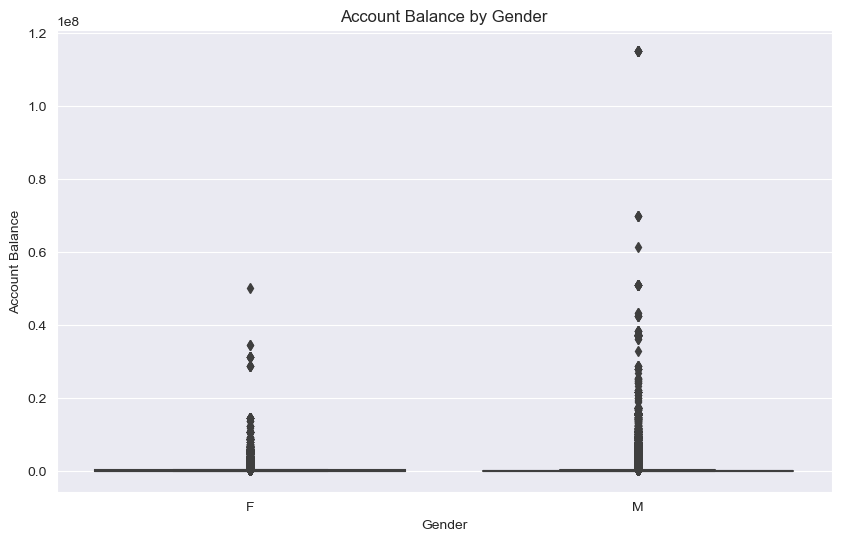

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CustGender', y='CustAccountBalance', data=bank_customer)
plt.title('Account Balance by Gender')
plt.xlabel('Gender')
plt.ylabel('Account Balance')
plt.show()

# 客户余额和交易金额关系

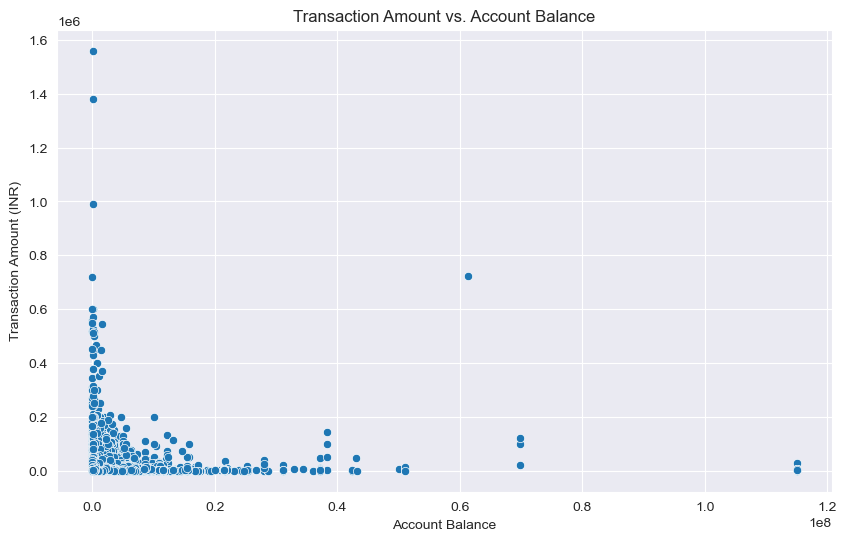

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CustAccountBalance', y='TransactionAmount (INR)', data=bank_customer)
plt.title('Transaction Amount vs. Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount (INR)')
plt.show()

用户总余额随时间变化